<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/augmented_reality/101/python_apriltag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install apriltag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.1 MB/s 
  Created wheel for apriltag: filename=apriltag-0.0.16-cp37-cp37m-linux_x86_64.whl size=562198 sha256=e1d39502dcd2e3f2999b55df85176dc7fcbab3609ff8b9551a4d7593e889f2f4
  Stored in directory: /root/.cache/pip/wheels/83/29/7f/e1690d95bf4c49d9e767fc1534853e010594256a8a177ac8dd
Successfully built apriltag


In [2]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/python-apriltag/python-apriltag.zip
!unzip -qq python-apriltag.zip
%cd python-apriltag

--2022-06-03 05:55:36--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/python-apriltag/python-apriltag.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.162.58
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.162.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978333 (955K) [application/zip]
Saving to: ‘python-apriltag.zip’

python-apriltag.zip 100%[===================>] 955.40K  2.26MB/s    in 0.4s    

2022-06-03 05:55:37 (2.26 MB/s) - ‘python-apriltag.zip’ saved [978333/978333]

/content/python-apriltag


In [3]:
# import the necessary packages
import matplotlib.pyplot as plt
import apriltag
import argparse
import cv2

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [5]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image containing AprilTag")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/example_02.png"
}

In [6]:
# load the input image and convert it to grayscale
print("[INFO] loading image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading image...


In [7]:
# define the AprilTags detector options and then detect the AprilTags
# in the input image
print("[INFO] detecting AprilTags...")
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 5 total AprilTags detected


[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11


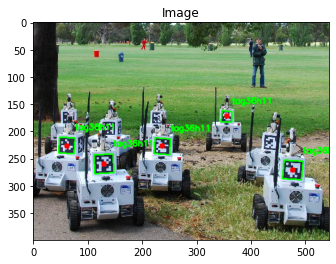

In [8]:
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))

	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)

	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))
 
 # show the output image after AprilTag detection
plt_imshow("Image", image)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*AprilTag with Python*](https://www.pyimagesearch.com/2020/11/02/apriltag-with-python/) blog post published on 11-02-20.